# Actividad


Armando Atanasio Navarrete Yépez 
Helena Eridani Escandón López A01659511

### Librerias

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Bases de datos

In [34]:
oecd_hi = pd.read_csv("OECD,DF_BLI,+all.csv")
gdp_per_capita = pd.read_csv("gdp-per-capita-worldbank.csv")

In [35]:
oecd_hi

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,...,2.4,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,...,3.8,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,...,2.3,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,...,4.5,NaN,A,NaN,PC,Percentage,0,Units,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,HS_LEB,Life expectancy,L,Value,...,77.9,NaN,A,NaN,YR,Years,0,Units,NaN,NaN
2365,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,HS_LEB,Life expectancy,L,Value,...,83.0,NaN,A,NaN,YR,Years,0,Units,NaN,NaN
2366,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,...,10.0,NaN,A,NaN,RATIO,Ratio,0,Units,NaN,NaN
2367,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,...,18.2,NaN,A,NaN,RATIO,Ratio,0,Units,NaN,NaN


In [36]:
gdp_per_capita

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",time
0,Afghanistan,AFG,2023.0,1992.4244,2023
1,Albania,ALB,2023.0,18244.2930,2023
2,Algeria,DZA,2023.0,15159.3240,2023
3,Andorra,AND,2023.0,64631.2970,2023
4,Angola,AGO,2023.0,7244.8930,2023
...,...,...,...,...,...
184,Uzbekistan,UZB,2023.0,10007.6860,2023
185,Vanuatu,VUT,2023.0,3118.3960,2023
186,Vietnam,VNM,2023.0,13491.8800,2023
187,Zambia,ZMB,2023.0,3673.4841,2023


In [37]:
# Renombramos la columna de PIB per cápita
gdp = gdp_per_capita.rename(columns={
    'Code': 'Country',
    'Entity': 'Country_name',
    'GDP per capita, PPP (constant 2021 international $)': 'GDP_per_capita'
})

gdp

,Country_name,Country,Year,GDP_per_capita,time
0,Afghanistan,AFG,2023.0,1992.4244,2023
1,Albania,ALB,2023.0,18244.2930,2023
2,Algeria,DZA,2023.0,15159.3240,2023
3,Andorra,AND,2023.0,64631.2970,2023
4,Angola,AGO,2023.0,7244.8930,2023
...,...,...,...,...,...
184,Uzbekistan,UZB,2023.0,10007.6860,2023
185,Vanuatu,VUT,2023.0,3118.3960,2023
186,Vietnam,VNM,2023.0,13491.8800,2023
187,Zambia,ZMB,2023.0,3673.4841,2023


In [38]:
#Limpiamos los datos del oecd eliminando del DataFrame los datos que no son relevantes para el objetivo
cols_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION',
    'Country', 'INDICATOR', 'MEASURE', 'INEQUALITY','Inequality',
    'Observation Value', 'OBS_STATUS', 'Observation Status',
    'Unit of Measures', 'UNIT_MULT', 'Multiplier',
    'BASE_PER', 'Base reference period'
]

oecd_hi_clean = oecd_hi.drop(columns=cols_to_drop)
oecd_hi_clean


,LOCATION,Indicator,Measure,OBS_VALUE,UNIT_MEASURE
0,AUT,Labour market insecurity,Value,2.3,PC
1,BEL,Labour market insecurity,Value,2.4,PC
2,CAN,Labour market insecurity,Value,3.8,PC
3,CZE,Labour market insecurity,Value,2.3,PC
4,DNK,Labour market insecurity,Value,4.5,PC
...,...,...,...,...,...
2364,CRI,Life expectancy,Value,77.9,YR
2365,CRI,Life expectancy,Value,83.0,YR
2366,CRI,Homicide rate,Value,10.0,RATIO
2367,CRI,Homicide rate,Value,18.2,RATIO


In [39]:
#Debido a la existencia de múltiples observaciones para un mismo país y un mismo indicador, 
# es necesario calcular el promedio para obtener un único valor representativo por combinación
oecd_avg = oecd_hi_clean.groupby(['LOCATION', 'Indicator'])['OBS_VALUE'].mean().reset_index() 

#Pivotear los datos para reorganizar el DataFrame, 
# colocando los países como índice y cada indicador como columna
oecd_ind = oecd_avg.pivot(index='LOCATION', columns='Indicator', values='OBS_VALUE')
oecd_ind


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,6.7,NaN,84.000000,12.366667,73.000000,67.333333,0.933333,37433.0,528768.0,19.4,...,55206.0,93.8,NaN,86.600000,2.7,501.2,14.270000,92.0,92.000000,20.333333
AUT,12.2,0.8,85.666667,5.266667,72.000000,85.666667,0.500000,37001.0,309637.0,20.8,...,53132.0,93.0,1.6,71.600000,1.3,489.2,14.506667,76.0,91.666667,17.000000
BEL,12.8,0.7,79.666667,4.233333,64.666667,56.333333,1.100000,34884.0,447607.0,20.0,...,54327.0,90.2,2.1,73.200000,2.0,498.0,15.483333,88.0,79.000000,19.333333
BRA,11.7,6.7,56.666667,5.500000,57.000000,44.666667,19.266667,NaN,NaN,NaN,...,NaN,85.0,NaN,NaN,2.2,408.6,NaN,80.0,70.333333,16.000000
CAN,7.1,0.2,92.333333,3.266667,70.000000,77.666667,1.233333,34421.0,478240.0,22.9,...,55342.0,93.2,2.6,88.200000,2.9,517.6,14.546667,68.0,90.333333,17.000000
CHE,10.1,0.0,89.000000,0.366667,80.000000,86.000000,0.333333,39697.0,NaN,21.4,...,64824.0,94.2,1.9,80.600000,2.3,493.6,NaN,45.0,95.666667,17.333333
CHL,23.4,9.4,67.333333,7.433333,56.000000,41.333333,2.433333,NaN,135787.0,18.4,...,26729.0,89.2,1.9,60.800000,1.3,446.0,NaN,47.0,62.000000,17.333333
COL,22.6,12.3,58.666667,23.000000,58.000000,49.666667,23.400000,NaN,NaN,NaN,...,NaN,82.2,1.0,80.400000,1.4,409.8,NaN,53.0,81.666667,14.000000
CRI,17.5,2.3,42.666667,20.866667,54.666667,47.333333,10.000000,16517.0,NaN,17.0,...,NaN,84.4,1.2,73.333333,1.8,422.6,NaN,66.0,87.333333,NaN


In [40]:
# Agregamos los datos relevantes del DataFrame de gdp. 
# Para esto, retiramos el índice de oecd_ind, ya que al estar indexado no comparte columnas con gdp y no se podría realizar la unión.
# Utilizamos merge para unir ambas tablas a través de las columnas 'LOCATION' y 'Country'. 
# Posteriormente, eliminamos las columnas que ya no son necesarias para quedarnos solo con los datos relevantes 
oecd_ind = oecd_ind.reset_index()
oecd_ind = oecd_ind.merge(gdp, left_on='LOCATION', right_on='Country', how='left')
oecd_ind = oecd_ind.drop(columns=['Country'])
oecd_ind = oecd_ind.set_index('LOCATION')
oecd_ind

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Country_name,Year,GDP_per_capita,time
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,6.7,NaN,84.000000,12.366667,73.000000,67.333333,0.933333,37433.0,528768.0,19.4,...,2.7,501.2,14.270000,92.0,92.000000,20.333333,Australia,2023.0,59552.880,2023.0
AUT,12.2,0.8,85.666667,5.266667,72.000000,85.666667,0.500000,37001.0,309637.0,20.8,...,1.3,489.2,14.506667,76.0,91.666667,17.000000,Austria,2023.0,65015.133,2023.0
BEL,12.8,0.7,79.666667,4.233333,64.666667,56.333333,1.100000,34884.0,447607.0,20.0,...,2.0,498.0,15.483333,88.0,79.000000,19.333333,Belgium,2023.0,64185.848,2023.0
BRA,11.7,6.7,56.666667,5.500000,57.000000,44.666667,19.266667,NaN,NaN,NaN,...,2.2,408.6,NaN,80.0,70.333333,16.000000,Brazil,2023.0,19018.238,2023.0
CAN,7.1,0.2,92.333333,3.266667,70.000000,77.666667,1.233333,34421.0,478240.0,22.9,...,2.9,517.6,14.546667,68.0,90.333333,17.000000,Canada,2023.0,55918.930,2023.0
CHE,10.1,0.0,89.000000,0.366667,80.000000,86.000000,0.333333,39697.0,NaN,21.4,...,2.3,493.6,NaN,45.0,95.666667,17.333333,Switzerland,2023.0,82557.550,2023.0
CHL,23.4,9.4,67.333333,7.433333,56.000000,41.333333,2.433333,NaN,135787.0,18.4,...,1.3,446.0,NaN,47.0,62.000000,17.333333,Chile,2023.0,29462.640,2023.0
COL,22.6,12.3,58.666667,23.000000,58.000000,49.666667,23.400000,NaN,NaN,NaN,...,1.4,409.8,NaN,53.0,81.666667,14.000000,Colombia,2023.0,18692.385,2023.0
CRI,17.5,2.3,42.666667,20.866667,54.666667,47.333333,10.000000,16517.0,NaN,17.0,...,1.8,422.6,NaN,66.0,87.333333,NaN,Costa Rica,2023.0,26292.771,2023.0


### Normalizaciones

In [41]:
# Debido a que las escalas de los indicadores son muy diferentes y con rangos amplios,
# es necesario normalizar para que ninguna variable domine el análisis.

# Usamos la fórmula de Min-Max normalización invertida para la mayoría de los indicadores,
# porque valores más altos indican peor situación.
# Para indicadores donde más es mejor, normalizamos sin invertir.

# Normalización de indicadores de salud y bienestar

oecd_ind['Air_pollution_norm'] = 1 - (oecd_ind['Air pollution'] - oecd_ind['Air pollution'].min()) / (oecd_ind['Air pollution'].max() - oecd_ind['Air pollution'].min())

oecd_ind['Self_reported_health_norm'] = (oecd_ind['Self-reported health'] - oecd_ind['Self-reported health'].min()) / (oecd_ind['Self-reported health'].max() - oecd_ind['Self-reported health'].min())

oecd_ind['Homicide_rate_norm'] = 1 - (oecd_ind['Homicide rate'] - oecd_ind['Homicide rate'].min()) / (oecd_ind['Homicide rate'].max() - oecd_ind['Homicide rate'].min())

oecd_ind['Feeling_safe_walking_alone_at_night_norm'] = (oecd_ind['Feeling safe walking alone at night'] - oecd_ind['Feeling safe walking alone at night'].min()) / (oecd_ind['Feeling safe walking alone at night'].max() - oecd_ind['Feeling safe walking alone at night'].min())

oecd_ind['Quality_of_support_network_norm'] = (oecd_ind['Quality of support network'] - oecd_ind['Quality of support network'].min()) / (oecd_ind['Quality of support network'].max() - oecd_ind['Quality of support network'].min())

oecd_ind['Years_in_education_norm'] = (oecd_ind['Years in education'] - oecd_ind['Years in education'].min()) / (oecd_ind['Years in education'].max() - oecd_ind['Years in education'].min())

#Lista de columnas normalizadas para el índice de Salud y Bienestar
cols = [
    'Air_pollution_norm',
    'Self_reported_health_norm',
    'Homicide_rate_norm',
    'Feeling_safe_walking_alone_at_night_norm',
    'Quality_of_support_network_norm',
    'Years_in_education_norm'
]

#Creamos un índice promedio de salud y bienestar, donde 1 es mejor y 0 peor
oecd_ind['Health_Wellbeing_Index'] = oecd_ind[cols].mean(axis=1)
print(oecd_ind['Health_Wellbeing_Index'].sort_values(ascending=False))

LOCATION
ISL     0.894176
FIN     0.885065
NOR     0.873322
AUS     0.858989
SWE     0.853436
IRL     0.831926
DNK     0.829426
NLD     0.803771
CHE     0.802925
CAN     0.798692
NZL     0.796630
ESP     0.785970
USA     0.775908
SVN     0.754266
EST     0.744703
AUT     0.738931
GBR     0.726869
FRA     0.698897
CZE     0.696992
DEU     0.693139
LUX     0.690079
BEL     0.680550
OECD    0.671799
ISR     0.665266
PRT     0.663648
ITA     0.641173
LVA     0.634202
SVK     0.629122
GRC     0.627636
HUN     0.624551
POL     0.614772
LTU     0.598321
JPN     0.535097
TUR     0.517685
RUS     0.514516
CHL     0.449259
CRI     0.448278
KOR     0.402478
BRA     0.344989
ZAF     0.265298
COL     0.264910
MEX     0.199729
Name: Health_Wellbeing_Index, dtype: float64


In [42]:
# Normalización de indicadores relacionados con vivienda.
# Al igual que antes, usamos Min-Max normalizado (invertido o no) según si el valor alto es malo o bueno.

oecd_ind['Dwellings_without_basic_facilities_norm'] = 1 - (oecd_ind['Dwellings without basic facilities'] - oecd_ind['Dwellings without basic facilities'].min()) / (oecd_ind['Dwellings without basic facilities'].max() - oecd_ind['Dwellings without basic facilities'].min())

oecd_ind['Housing_expenditure_norm'] = 1 - (oecd_ind['Housing expenditure'] - oecd_ind['Housing expenditure'].min()) / (oecd_ind['Housing expenditure'].max() - oecd_ind['Housing expenditure'].min())

oecd_ind['Rooms_per_person_norm'] = (oecd_ind['Rooms per person'] - oecd_ind['Rooms per person'].min()) / (oecd_ind['Rooms per person'].max() - oecd_ind['Rooms per person'].min())

# Lista de columnas normalizadas para el índice de vivienda
cols_housing = [
    'Dwellings_without_basic_facilities_norm',
    'Housing_expenditure_norm',
    'Rooms_per_person_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Housing_Index'] = oecd_ind[cols_housing].mean(axis=1)
print(oecd_ind['Housing_Index'].sort_values(ascending=False))


LOCATION
USA     0.862917
NOR     0.817093
BRA     0.813370
CAN     0.782920
BEL     0.750226
KOR     0.747621
NLD     0.745463
IRL     0.739121
LUX     0.716591
EST     0.699208
SVN     0.697946
DEU     0.693297
ISL     0.687500
CHE     0.678314
PRT     0.675535
FRA     0.671210
SWE     0.670768
CHL     0.669774
ESP     0.667654
GBR     0.647260
OECD    0.632414
FIN     0.629980
AUS     0.629921
CRI     0.626610
AUT     0.624134
DNK     0.623802
JPN     0.608391
HUN     0.581019
LTU     0.564157
ITA     0.539705
CZE     0.537844
NZL     0.531988
GRC     0.518268
TUR     0.510934
POL     0.495541
RUS     0.467667
LVA     0.444236
ZAF     0.366142
MEX     0.365652
SVK     0.340239
COL     0.328691
ISR     0.125000
Name: Housing_Index, dtype: float64


In [43]:
# Normalización de indicadores relacionados con el ingreso

oecd_ind['Household_net_adjusted_disposable_income_norm'] = (oecd_ind['Household net adjusted disposable income'] - oecd_ind['Household net adjusted disposable income'].min()) / (oecd_ind['Household net adjusted disposable income'].max() - oecd_ind['Household net adjusted disposable income'].min())

oecd_ind['Household_net_wealth_norm'] = (oecd_ind['Household net wealth'] - oecd_ind['Household net wealth'].min()) / (oecd_ind['Household net wealth'].max() - oecd_ind['Household net wealth'].min())

# Lista de columnas normalizadas para el índice de ingreso
cols_inc = [
    'Household_net_adjusted_disposable_income_norm',
    'Household_net_wealth_norm',
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Income_Index'] = oecd_ind[cols_inc].mean(axis=1)
print(oecd_ind['Income_Index'].sort_values(ascending=False))

LOCATION
LUX     0.923772
USA     0.851110
CHE     0.726136
NZL     0.607316
AUS     0.596762
SWE     0.583415
GBR     0.541812
CAN     0.531429
BEL     0.519196
DEU     0.484950
NOR     0.466159
AUT     0.464477
FRA     0.426692
CZE     0.414408
IRL     0.409842
NLD     0.404947
OECD    0.394920
ESP     0.379733
FIN     0.376082
ITA     0.365467
JPN     0.358616
KOR     0.346625
DNK     0.333200
PRT     0.287965
SVN     0.279653
LTU     0.270566
POL     0.260780
RUS     0.244158
EST     0.236215
SVK     0.194723
HUN     0.180995
GRC     0.177040
CRI     0.171709
MEX     0.165778
LVA     0.124913
CHL     0.065600
ZAF     0.000000
BRA          NaN
COL          NaN
ISL          NaN
ISR          NaN
TUR          NaN
Name: Income_Index, dtype: float64


In [44]:
# Normalización de indicadores relacionados con la educación.

oecd_ind['Educational_attainment_norm'] = (oecd_ind['Educational attainment'] - oecd_ind['Educational attainment'].min()) / (oecd_ind['Educational attainment'].max() - oecd_ind['Educational attainment'].min())

oecd_ind['Student_skills_norm'] = (oecd_ind['Student skills'] - oecd_ind['Student skills'].min()) / (oecd_ind['Student skills'].max() - oecd_ind['Student skills'].min())

oecd_ind['Years_in_education_norm'] = (oecd_ind['Years in education'] - oecd_ind['Years in education'].min()) / (oecd_ind['Years in education'].max() - oecd_ind['Years in education'].min())

# Lista de columnas normalizadas para el índice de educación
cols_edu = [
    'Educational_attainment_norm',
    'Student_skills_norm',
    'Years_in_education_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Edu_Index'] = oecd_ind[cols_edu].mean(axis=1)
print(oecd_ind['Edu_Index'].sort_values(ascending=False))


LOCATION
FIN     0.920490
AUS     0.859943
EST     0.832566
SWE     0.831080
POL     0.813013
SVN     0.796707
DNK     0.792162
CAN     0.782994
KOR     0.781788
IRL     0.772068
BEL     0.771173
NLD     0.762528
CZE     0.761152
DEU     0.756812
LTU     0.751712
USA     0.748833
LVA     0.739909
NOR     0.730681
NZL     0.713858
CHE     0.711793
ISL     0.674685
GBR     0.668609
AUT     0.660965
RUS     0.656480
OECD    0.652688
FRA     0.632184
GRC     0.613384
JPN     0.598472
HUN     0.594751
SVK     0.562281
ISR     0.539725
ESP     0.515789
PRT     0.483266
ITA     0.463271
LUX     0.446566
CHL     0.441684
TUR     0.411998
BRA     0.199013
ZAF     0.118750
COL     0.109646
MEX     0.099604
CRI     0.068798
Name: Edu_Index, dtype: float64


In [45]:
# Normalización de indicadores relacionados con la seguridad, sentirse seguros

oecd_ind['Feeling_safe_walking_alone_at_night_norm'] = (oecd_ind['Feeling safe walking alone at night'] - oecd_ind['Feeling safe walking alone at night'].min()) / (oecd_ind['Feeling safe walking alone at night'].max() - oecd_ind['Feeling safe walking alone at night'].min())

oecd_ind['Homicide_rate_norm'] = (1- (oecd_ind['Homicide rate'] - oecd_ind['Homicide rate'].min()) / (oecd_ind['Homicide rate'].max() - oecd_ind['Homicide rate'].min()))

# Lista de columnas normalizadas para el índice de seguridad
cols_sec = [
    'Feeling_safe_walking_alone_at_night_norm',
    'Homicide_rate_norm',
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Sec_Index'] = oecd_ind[cols_sec].mean(axis=1)
print(oecd_ind['Sec_Index'].sort_values(ascending=False))

LOCATION
NOR     0.992102
SVN     0.967445
LUX     0.935892
FIN     0.930244
CHE     0.927780
AUT     0.921598
DNK     0.917845
ISL     0.915415
NLD     0.897762
PRT     0.895940
KOR     0.881539
ESP     0.867638
GBR     0.858491
ISR     0.849305
SWE     0.848984
JPN     0.845304
EST     0.843230
CZE     0.839336
IRL     0.834155
DEU     0.832833
CAN     0.832760
SVK     0.828080
FRA     0.812750
HUN     0.804244
ITA     0.802101
POL     0.785770
OECD    0.772653
GRC     0.755252
USA     0.752172
LVA     0.745100
AUS     0.740744
NZL     0.724627
LTU     0.665020
TUR     0.657768
RUS     0.640145
BEL     0.633932
CHL     0.468122
CRI     0.386815
ZAF     0.247874
BRA     0.192764
COL     0.164600
MEX     0.022013
Name: Sec_Index, dtype: float64


In [46]:
# Normalización de indicadores relacionados con el compromiso ético

oecd_ind['Stakeholder_engagement_for_developing_regulations_norm'] = (oecd_ind['Stakeholder engagement for developing regulations'] - oecd_ind['Stakeholder engagement for developing regulations'].min()) / (oecd_ind['Stakeholder engagement for developing regulations'].max() - oecd_ind['Stakeholder engagement for developing regulations'].min())

oecd_ind['Voter_turnout_norm'] = (oecd_ind['Voter turnout'] - oecd_ind['Voter turnout'].min()) / (oecd_ind['Voter turnout'].max() - oecd_ind['Voter turnout'].min())

# Lista de columnas normalizadas para el índice de compromiso ético
cols_civ = [
    'Stakeholder_engagement_for_developing_regulations_norm',
    'Voter_turnout_norm',
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Civ_Index'] = oecd_ind[cols_civ].mean(axis=1)
print(oecd_ind['Civ_Index'].sort_values(ascending=False))

LOCATION
AUS     0.875000
KOR     0.765426
GBR     0.719681
NZL     0.718617
NLD     0.711702
MEX     0.691489
USA     0.687766
SVK     0.673404
CAN     0.669681
BEL     0.657447
SWE     0.646809
DNK     0.625532
ITA     0.622872
BRA     0.622340
ISL     0.607979
LUX     0.603723
NOR     0.601064
POL     0.594681
EST     0.577128
ISR     0.559043
FRA     0.544149
TUR     0.511170
FIN     0.505319
RUS     0.489362
OECD    0.480319
DEU     0.479787
ZAF     0.446809
ESP     0.437234
LTU     0.427660
SVN     0.410106
CRI     0.373404
LVA     0.356383
AUT     0.354787
GRC     0.288298
CZE     0.280851
CHE     0.275000
HUN     0.265957
IRL     0.216489
JPN     0.135106
COL     0.135106
PRT     0.117553
CHL     0.046277
Name: Civ_Index, dtype: float64


In [47]:
# Normalización de indicadores relacionados con el trabajo

oecd_ind['Labour_market_insecurity_norm'] = (1-(oecd_ind['Labour market insecurity'] - oecd_ind['Labour market insecurity'].min()) / (oecd_ind['Labour market insecurity'].max() - oecd_ind['Labour market insecurity'].min()))

oecd_ind['Employment_rate_norm'] = (oecd_ind['Employment rate'] - oecd_ind['Employment rate'].min()) / (oecd_ind['Employment rate'].max() - oecd_ind['Employment rate'].min())

oecd_ind['Long-term_unemployment_rate_norm'] = (1-(oecd_ind['Long-term unemployment rate'] - oecd_ind['Long-term unemployment rate'].min()) / (oecd_ind['Long-term unemployment rate'].max() - oecd_ind['Long-term unemployment rate'].min()))

oecd_ind['Personal_earnings_norm'] = (oecd_ind['Personal earnings'] - oecd_ind['Personal earnings'].min()) / (oecd_ind['Personal earnings'].max() - oecd_ind['Personal earnings'].min())

# Lista de columnas normalizadas para el índice de trabajo
cols_work = [
    'Labour_market_insecurity_norm',
    'Employment_rate_norm','Long-term_unemployment_rate_norm',
    'Personal_earnings_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Work_Index'] = oecd_ind[cols_work].mean(axis=1)
print(oecd_ind['Work_Index'].sort_values(ascending=False))

LOCATION
ISL     0.967742
CHE     0.940108
NLD     0.907241
DEU     0.884882
USA     0.876290
NOR     0.871599
LUX     0.866343
DNK     0.857022
AUS     0.851341
RUS     0.848701
AUT     0.841066
CAN     0.832735
GBR     0.826979
NZL     0.818612
FIN     0.813670
SWE     0.811718
JPN     0.807567
IRL     0.798345
BEL     0.787796
KOR     0.763374
CZE     0.754411
OECD    0.754320
ISR     0.733728
FRA     0.731497
SVN     0.728308
EST     0.712626
COL     0.702621
POL     0.701049
HUN     0.680764
LVA     0.669428
LTU     0.651814
CRI     0.648512
PRT     0.625303
MEX     0.591422
SVK     0.574588
ITA     0.559801
ESP     0.494541
TUR     0.480447
BRA     0.443548
CHL     0.442330
GRC     0.254805
ZAF     0.000000
Name: Work_Index, dtype: float64


In [48]:
# Normalización de indicadores relacionados con el ambiente

oecd_ind['Air_pollution_norm'] = (1-(oecd_ind['Air pollution'] - oecd_ind['Air pollution'].min()) / (oecd_ind['Air pollution'].max() - oecd_ind['Air pollution'].min()))

oecd_ind['Water_quality_norm'] = (oecd_ind['Water quality'] - oecd_ind['Water quality'].min()) / (oecd_ind['Water quality'].max() - oecd_ind['Water quality'].min())


# Lista de columnas normalizadas para el índice de ambiente
cols_env = [
    'Air_pollution_norm',
    'Water_quality_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Environment_Index'] = oecd_ind[cols_env].mean(axis=1)
print(oecd_ind['Environment_Index'].sort_values(ascending=False))

LOCATION
SWE     0.984304
FIN     0.981651
NOR     0.973913
ISL     0.966673
AUS     0.891344
CHE     0.867890
CAN     0.859713
DNK     0.828779
EST     0.826167
PRT     0.819864
USA     0.814559
NZL     0.805644
AUT     0.767192
NLD     0.762605
DEU     0.762365
LUX     0.723275
IRL     0.702294
LTU     0.684882
GBR     0.679817
SVN     0.676606
JPN     0.670363
LVA     0.641643
CZE     0.630734
OECD    0.627144
FRA     0.601097
ESP     0.599422
CRI     0.592341
BEL     0.579836
HUN     0.522577
ITA     0.489509
SVK     0.488034
BRA     0.484483
POL     0.408317
COL     0.403490
ISR     0.397726
GRC     0.382329
RUS     0.363043
MEX     0.361747
KOR     0.305903
ZAF     0.142202
CHL     0.115457
TUR     0.035022
Name: Environment_Index, dtype: float64


In [49]:
# Normalización de indicadores relacionados con la comunidad

oecd_ind['Quality_of_support_network_norm'] = (1-(oecd_ind['Quality of support network'] - oecd_ind['Quality of support network'].min()) / (oecd_ind['Quality of support network'].max() - oecd_ind['Quality of support network'].min()))


# Lista de columnas normalizadas para el índice de la comunidad
cols_com = [
    'Quality_of_support_network_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Community_Index'] = oecd_ind[cols_com].mean(axis=1)
print(oecd_ind['Community_Index'].sort_values(ascending=False))

LOCATION
MEX     1.000000
GRC     1.000000
KOR     0.926702
COL     0.853403
CRI     0.738220
BRA     0.706806
TUR     0.633508
CHL     0.486911
JPN     0.486911
PRT     0.465969
RUS     0.465969
ITA     0.465969
LTU     0.445026
DEU     0.434555
ZAF     0.434555
BEL     0.434555
LUX     0.382199
OECD    0.361257
LVA     0.308901
GBR     0.298429
AUT     0.287958
CAN     0.277487
AUS     0.246073
USA     0.235602
SWE     0.235602
ESP     0.235602
CHE     0.225131
NLD     0.214660
HUN     0.204188
POL     0.204188
FRA     0.193717
NZL     0.193717
EST     0.193717
DNK     0.183246
SVN     0.183246
SVK     0.172775
ISR     0.162304
NOR     0.130890
IRL     0.120419
CZE     0.099476
FIN     0.078534
ISL     0.000000
Name: Community_Index, dtype: float64


In [50]:
# Normalización de indicadores relacionados con la satisfacción de vida

oecd_ind['Life_satisfaction_norm'] = (1-(oecd_ind['Life satisfaction'] - oecd_ind['Life satisfaction'].min()) / (oecd_ind['Life satisfaction'].max() - oecd_ind['Life satisfaction'].min()))


# Lista de columnas normalizadas para el índice de satisfacción de vida
cols_sat = [
    'Life_satisfaction_norm',
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Satisfaction_Index'] = oecd_ind[cols_sat].mean(axis=1)
print(oecd_ind['Satisfaction_Index'].sort_values(ascending=False))

LOCATION
TUR     1.000000
ZAF     0.993289
RUS     0.838926
KOR     0.731544
GRC     0.704698
COL     0.684564
PRT     0.671141
JPN     0.617450
HUN     0.610738
POL     0.610738
MEX     0.604027
LVA     0.590604
CHL     0.577181
BRA     0.570470
SVN     0.518456
EST     0.510067
CRI     0.503356
LTU     0.503356
SVK     0.483221
ITA     0.463087
ESP     0.456376
OECD    0.416107
FRA     0.416107
GBR     0.389262
BEL     0.382550
CAN     0.328859
CZE     0.328859
IRL     0.315436
USA     0.308725
AUS     0.288591
ISR     0.255034
NZL     0.255034
AUT     0.248322
NOR     0.241611
SWE     0.228188
DEU     0.208054
LUX     0.187919
CHE     0.174497
DNK     0.167785
NLD     0.161074
ISL     0.132550
FIN     0.000000
Name: Satisfaction_Index, dtype: float64


In [51]:
# Normalización de indicadores relacionados con la satisfacción de vida

oecd_ind['Life_satisfaction_norm'] = (1-(oecd_ind['Life satisfaction'] - oecd_ind['Life satisfaction'].min()) / (oecd_ind['Life satisfaction'].max() - oecd_ind['Life satisfaction'].min()))


# Lista de columnas normalizadas para el índice de satisfacción de vida
cols_sat = [
    'Life_satisfaction_norm',
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Satisfaction_Index'] = oecd_ind[cols_sat].mean(axis=1)
print(oecd_ind['Satisfaction_Index'].sort_values(ascending=False))

LOCATION
TUR     1.000000
ZAF     0.993289
RUS     0.838926
KOR     0.731544
GRC     0.704698
COL     0.684564
PRT     0.671141
JPN     0.617450
HUN     0.610738
POL     0.610738
MEX     0.604027
LVA     0.590604
CHL     0.577181
BRA     0.570470
SVN     0.518456
EST     0.510067
CRI     0.503356
LTU     0.503356
SVK     0.483221
ITA     0.463087
ESP     0.456376
OECD    0.416107
FRA     0.416107
GBR     0.389262
BEL     0.382550
CAN     0.328859
CZE     0.328859
IRL     0.315436
USA     0.308725
AUS     0.288591
ISR     0.255034
NZL     0.255034
AUT     0.248322
NOR     0.241611
SWE     0.228188
DEU     0.208054
LUX     0.187919
CHE     0.174497
DNK     0.167785
NLD     0.161074
ISL     0.132550
FIN     0.000000
Name: Satisfaction_Index, dtype: float64


In [52]:
# Normalización de indicadores relacionados con el equilibrio vida trabajo

oecd_ind['Employees_working_very_long_hours_norm'] = (1-(oecd_ind['Employees working very long hours'] - oecd_ind['Employees working very long hours'].min()) / (oecd_ind['Employees working very long hours'].max() - oecd_ind['Employees working very long hours'].min()))

oecd_ind['Time_devoted_to_leisure_and_personal_care_norm'] = (1-(oecd_ind['Time devoted to leisure and personal care'] - oecd_ind['Time devoted to leisure and personal care'].min()) / (oecd_ind['Time devoted to leisure and personal care'].max() - oecd_ind['Time devoted to leisure and personal care'].min()))


# Lista de columnas normalizadas para el índice de equilibrio vida trabajo
cols_eq = [
    'Employees_working_very_long_hours_norm',
    'Time_devoted_to_leisure_and_personal_care_norm'
]

#Creamos un índice promedio de housing, donde 1 es mejor y 0 peor
oecd_ind['Balance_Index'] = oecd_ind[cols_eq].mean(axis=1)
print(oecd_ind['Balance_Index'].sort_values(ascending=False))

LOCATION
RUS     1.000000
JPN     1.000000
CHE     0.990909
SWE     0.970130
LTU     0.967532
DNK     0.962338
LVA     0.940260
LUX     0.898701
SVK     0.845455
CAN     0.837292
CZE     0.833766
IRL     0.815549
AUT     0.807436
POL     0.801222
SVN     0.792208
BRA     0.790909
PRT     0.784416
EST     0.760195
HUN     0.759307
AUS     0.722993
CHL     0.715584
USA     0.698761
GRC     0.696743
FIN     0.687509
KOR     0.681335
NLD     0.675922
NOR     0.614821
BEL     0.605259
NZL     0.601536
GBR     0.601009
OECD    0.594590
ESP     0.589599
DEU     0.580316
ISL     0.555844
ISR     0.454545
TUR     0.443587
ITA     0.438961
ZAF     0.414286
FRA     0.380670
CRI     0.192208
COL     0.109091
MEX     0.000000
Name: Balance_Index, dtype: float64


### Gráficas

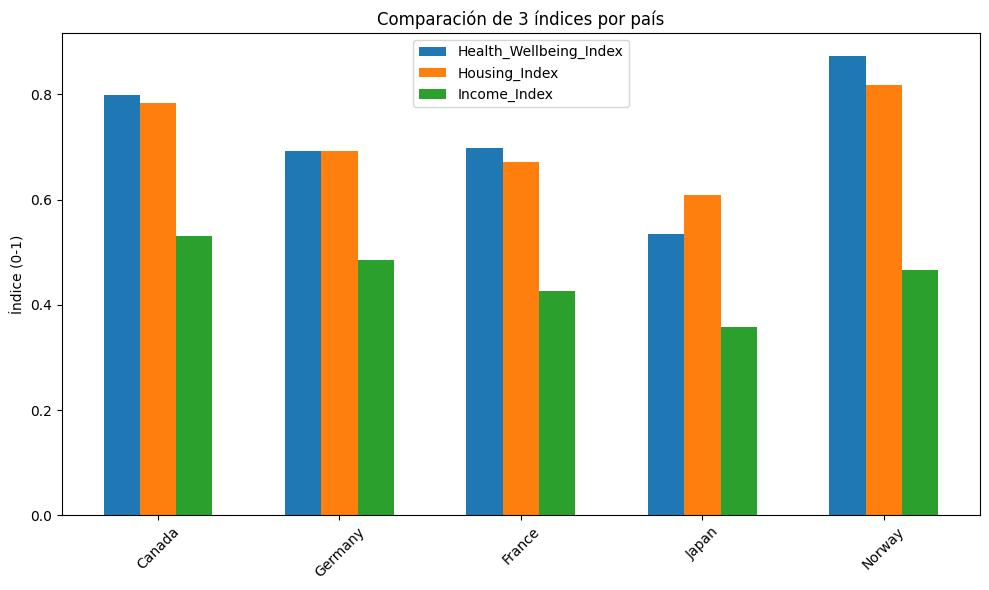

In [53]:
# Gráfica Helena

# Seleccionamos 5 países específicos
paises = ['Norway', 'France', 'Japan', 'Germany', 'Canada']
df_sub = oecd_ind[oecd_ind['Country_name'].isin(paises)]


indices = ['Health_Wellbeing_Index', 'Housing_Index', 'Income_Index']
ancho = 0.2
x = np.arange(len(paises))

plt.figure(figsize=(10, 6))
for i, idx in enumerate(indices):
    plt.bar(x + i * ancho, df_sub[idx], width=ancho, label=idx)

plt.xticks(x + ancho, df_sub['Country_name'], rotation=45)
plt.ylabel('Índice (0-1)')
plt.title('Comparación de 3 índices por país')
plt.legend()
plt.tight_layout()
plt.show()


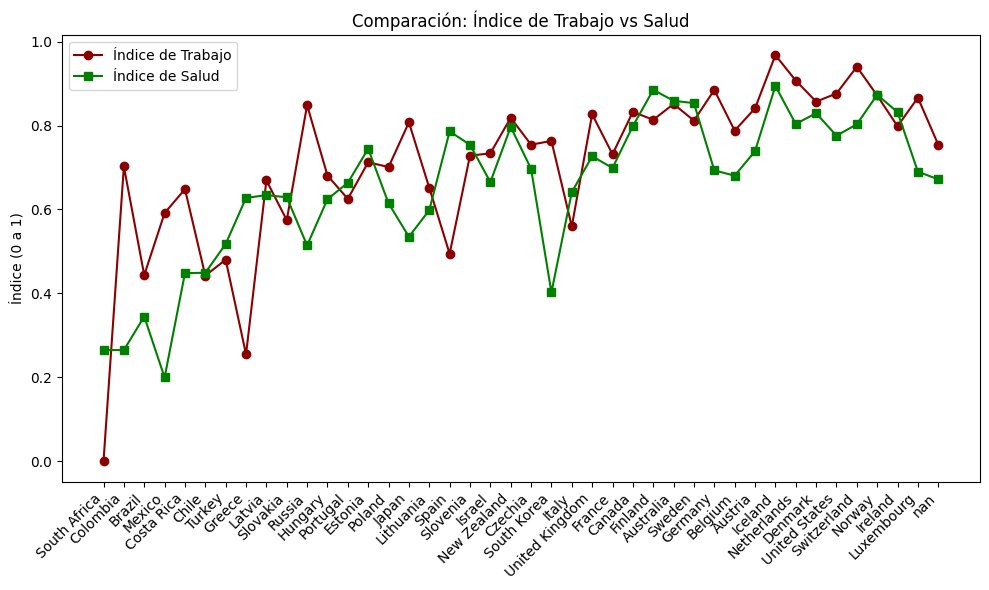

In [54]:

# Ordenar el DataFrame por PIB
df_sorted = oecd_ind.sort_values(by='GDP_per_capita')

# Crear valores numéricos para el eje X
x = range(len(df_sorted))

# Extraer los dos índices
y1 = df_sorted['Work_Index']
y2 = df_sorted['Health_Wellbeing_Index']

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Índice de Trabajo', color='darkred', marker='o')
plt.plot(x, y2, label='Índice de Salud', color='green', marker='s')

# Etiquetas del eje X con nombres de país
plt.xticks(ticks=x, labels=df_sorted['Country_name'], rotation=45, ha='right')

plt.ylabel('Índice (0 a 1)')
plt.title('Comparación: Índice de Trabajo vs Salud')
plt.legend()
plt.tight_layout()
plt.show()
